In [24]:
import numpy as npy
from collections import Counter

In [25]:
def euclidean_distance(x, y):
  return npy.sqrt(npy.sum(npy.array(x) - npy.array(y))**2)

In [26]:
def knn_predict(train_data, train_label, test_point, k):
  distances = []

  for i in range(len(train_data)):
    dist = euclidean_distance(test_point, train_data[i])
    distances.append((dist, train_label[i]))

  distances.sort(key=lambda x : x[0])
  k_nearest_label = [label for _, label in distances[:k]]
  return Counter(k_nearest_label).most_common(1)[0][0]

In [27]:
training_data = [[1, 2], [2, 3], [3, 4], [6, 7], [7, 8]]
training_labels = ['A', 'A', 'A', 'B', 'B']
test_point = [4, 5]
k = 3

In [28]:
prediction = knn_predict(training_data, training_labels, test_point, k)
print(prediction)

A


**Decision Boundaries for Binary Classification with Varying k**

In [31]:
from sklearn.datasets import make_classification

X, y = make_classification(
  n_samples=200, n_features=2, n_informative=2, n_redundant=0,
  n_clusters_per_class=1, random_state=42
)

x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 0].min()-1, X[:, 0].max()+1

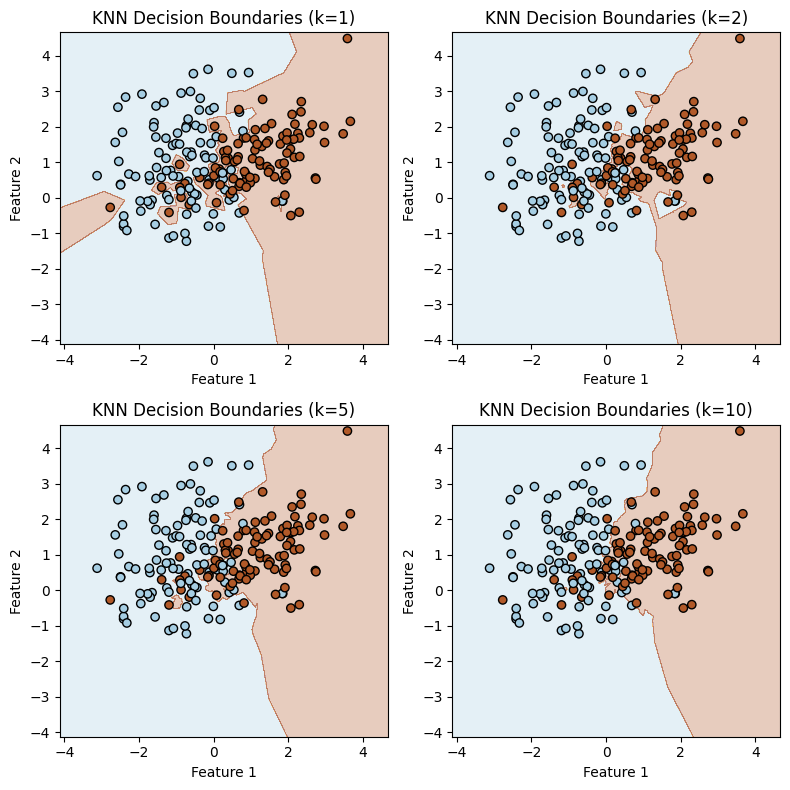

In [33]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

xx, yy = npy.meshgrid(npy.arange(x_min, x_max, 0.01), npy.arange(y_min, y_max, 0.01))

fig, axs = plt.subplots(2, 2, figsize=(8, 8))
k_values = [1, 2, 5, 10]

for ax, k in zip(axs.flat, k_values):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X, y)
  
  Z = knn.predict(npy.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
  ax.scatter(
    X[:, 0], X[:, 1], c=y, edgecolor='k',
    cmap=plt.cm.Paired, marker='o'
  )

  ax.set_title(f'KNN Decision Boundaries (k={k})')
  ax.set_xlabel('Feature 1')
  ax.set_ylabel('Feature 2')

plt.tight_layout()
plt.show()